## Credit Card Risk Assessment

This project focuses on prediciting the likelihood of credit default among customers using ML.

Problem Statement: To prepdict whether a customer will default on their payment in the next month.

Objective:
1. To assess credit risk more accurately
2. Reduce non performing loans
3. Strategically optimize credit approal processes

In [1]:
import pandas as pd

In [24]:
credit_df=pd.read_csv('Credit_default_dataset.csv')
credit_df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


##DATA EXPLORATION AND PREPROCESSING


In [25]:
#We don't need the ID column,so lets drop it.
credit_df = credit_df.drop(["ID"],axis=1)

In [26]:
#changing the name of  pay_0 column to pay_1 to make the numbering correct
credit_df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [51]:
credit_df.isnull().sum()


,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_1,0
PAY_2,0
PAY_3,0
PAY_4,0
PAY_5,0


In [27]:
credit_df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [28]:
#Removing Unwanted categorical levels as mentioned in data exploration
credit_df['EDUCATION'].value_counts()

,count
EDUCATION,
2,14030
1,10585
3,4917
5,280
4,123
6,51
0,14


## Data Preprocessing Steps

In [29]:
credit_df["EDUCATION"]=credit_df["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})
credit_df["MARRIAGE"]=credit_df["MARRIAGE"].map({0:3,1:1,2:2,3:3})

In [30]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
X=credit_df.drop(['default.payment.next.month'],axis=1)
X=scaling.fit_transform(X)

In [31]:
print(X)

[[-1.13672015  0.81016074  0.21186989 ... -0.30806256 -0.31413612
  -0.29338206]
 [-0.3659805   0.81016074  0.21186989 ... -0.24422965 -0.31413612
  -0.18087821]
 [-0.59720239  0.81016074  0.21186989 ... -0.24422965 -0.24868274
  -0.01212243]
 ...
 [-1.05964618 -1.23432296  0.21186989 ... -0.03996431 -0.18322937
  -0.11900109]
 [-0.67427636 -1.23432296  1.55508562 ... -0.18512036  3.15253642
  -0.19190359]
 [-0.90549825 -1.23432296  0.21186989 ... -0.24422965 -0.24868274
  -0.23713013]]


Target variable (y) = default.payment.next.month(1 default, 0 no default)

In [32]:
y=credit_df['default.payment.next.month']

In [35]:
print(y)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64


In [37]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}

In [38]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [43]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [39]:
classifier=xgboost.XGBClassifier()

In [40]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [44]:

from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 25.93 seconds.


In [45]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [47]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0.1, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [55]:
# Cross-validation
scores = cross_val_score(random_search.best_estimator_, X, y, cv=10)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.80133333 0.80766667 0.811      0.80666667 0.81766667 0.82266667
 0.82966667 0.825      0.82233333 0.82133333]


In [56]:
scores.mean()

0.8165333333333333

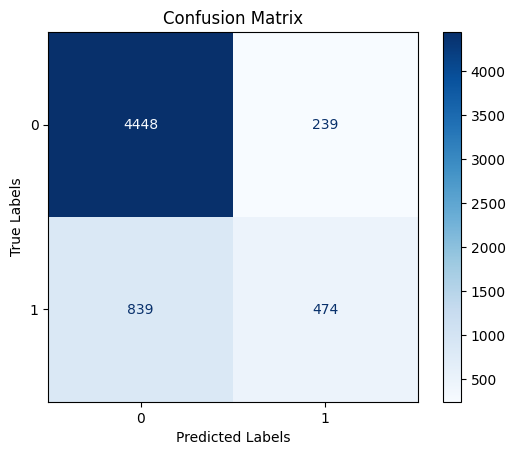

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model with the best parameters
classifier = xgboost.XGBClassifier(
    learning_rate=0.25,
    max_depth=3,
    min_child_weight=1,
    gamma=0.2,
    colsample_bytree=0.5
)
classifier.fit(X_train, y_train)

# Making predictions
y_pred = classifier.predict(X_test)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap='Blues')
disp.ax_.set_title("Confusion Matrix")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")

import matplotlib.pyplot as plt
plt.show()


##MODEL DEVELOPMENT

Algorith: Extreme Gradient Boosting(XGBoost) was chosen due to its highperformance for structured data, capability to handle missing values and non linear relationships effectively

Hyperparamter tuning: Used RandomizedSearchCV to optimize key hyperparameters such to controls the step size by learning_rate, max_depth, gamma.

Training the model using Cross-validation







## Insights:
a) Pay1 to pay 6 this variables is crucial inidentifying defaulters
b) Bill_amount: higher historical bills relative to payments indicate financial stress
c)limit_bal: customers with lower credit limits showed higher default tendencies

##Model Accuracy:

82%

